In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

* 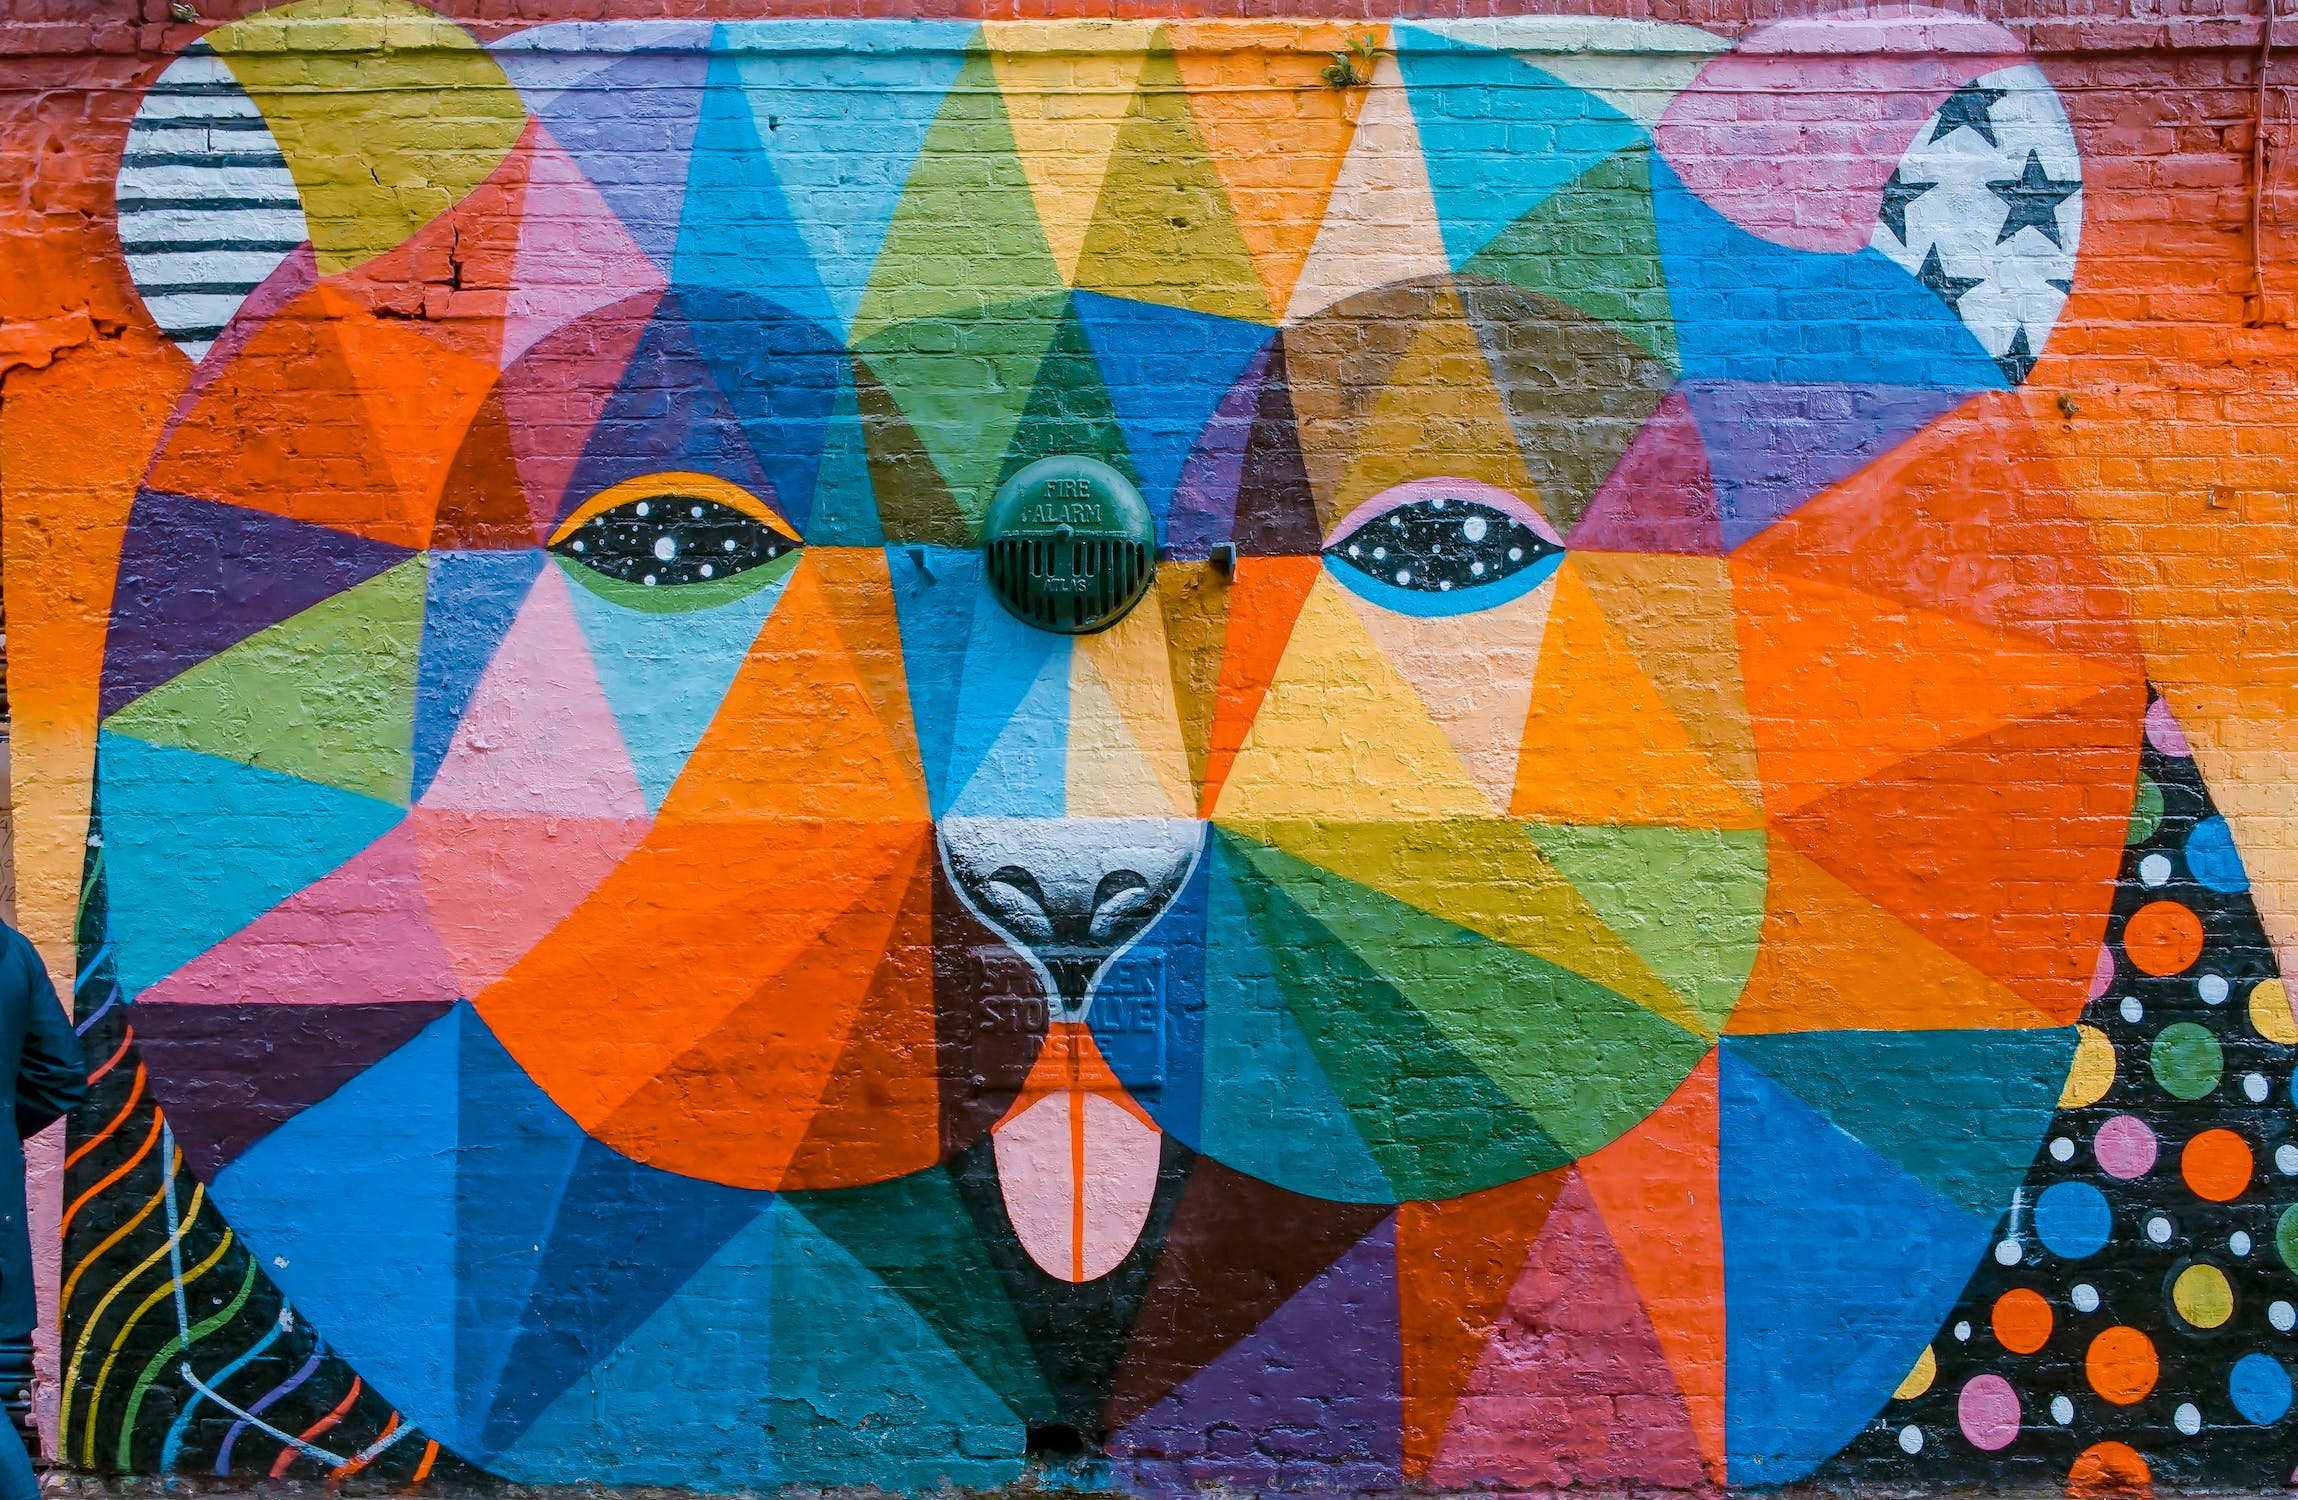
In this notebook, we will discuss how to detect and remove outliers in a hotel reservations cancellation dataset using Python.

### Kindly upvote this notebook ✔️
You can also check out my other data stories on Medium as well: https://medium.com/@asafoadjeilisa




In [ ]:
# The hotel reservations dataset
# https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import seaborn as sns
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization


# Load the hotel reservations cancellation dataset

df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")


In [ ]:
df.head(3)

### Detecting Outliers



In [ ]:

# Create a box plot to identify outliers in the price variable
sns.boxplot(x=df['avg_price_per_room'])


Distribution of numeric features are different from each other. Almost all of the distributions have skewed distributions.

In [ ]:
f,ax=plt.subplots(3,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["no_of_adults"],bins=20,ax=ax[0,0],color='orange');

sns.distplot(df["no_of_children"],bins=20,ax=ax[0,1],color='orange');

sns.distplot(df["no_of_weekend_nights"],bins=20,ax=ax[0,2],color='orange');

sns.distplot(df["no_of_week_nights"],bins=20,ax=ax[1,0],color='red');

sns.distplot(df["no_of_special_requests"],bins=20,ax=ax[1,1],color='red');

sns.distplot(df["lead_time"],bins=20,ax=ax[1,2],color='red');

sns.distplot(df["no_of_previous_cancellations"],bins=20,ax=ax[2,0],color='black');

sns.distplot(df["no_of_previous_bookings_not_canceled"],bins=20,ax=ax[2,1],color='black');

sns.distplot(df["avg_price_per_room"],bins=20,ax=ax[2,2],color='black');

### Z-Score

In [ ]:
# Calculate the Z-score of the price variable
z_scores = np.abs((df['avg_price_per_room'] - df['avg_price_per_room'].mean()) / df['avg_price_per_room'].std())

# Identify outliers with a Z-score greater than 3
outliers = df[z_scores > 3]
print(outliers)

In [ ]:
# Calculate the IQR of the price variable
q1 = df['avg_price_per_room'].quantile(0.25)
q3 = df['avg_price_per_room'].quantile(0.75)
iqr = q3 - q1

# Identify outliers outside the range of 1.5 times the IQR
outliers = df[(df['avg_price_per_room'] < q1 - 1.5*iqr) | (df['avg_price_per_room'] > q3 + 1.5*iqr)]
